In [1]:
# Importing numpy and all functions in implementations.py
import numpy as np
from implementations import *
import helpers as h
import matplotlib.pyplot as plt

In [2]:
# Loading the data and printing the shapes
X, xHeader, Y, yHeader, indexedX, indexedXheader, indexedY, indexedYheader = loadTrainingData()

Data successfully loaded, there are 321 features and 328135 samples, the shapes of the unindexed data is:
y: (328135, 1), x: (328135, 321)


Out of 105331335 there are 58155556 valid entries, that is 0.5521201834193026 percent valid entries.


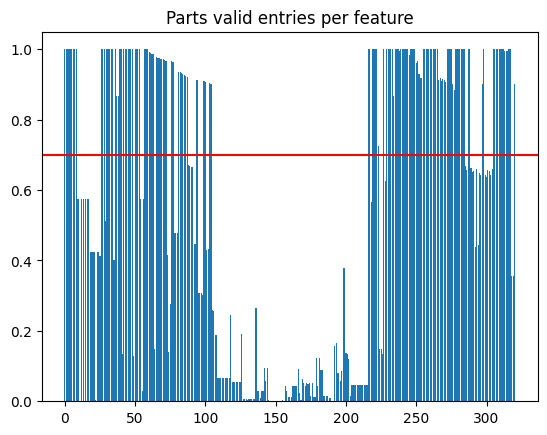

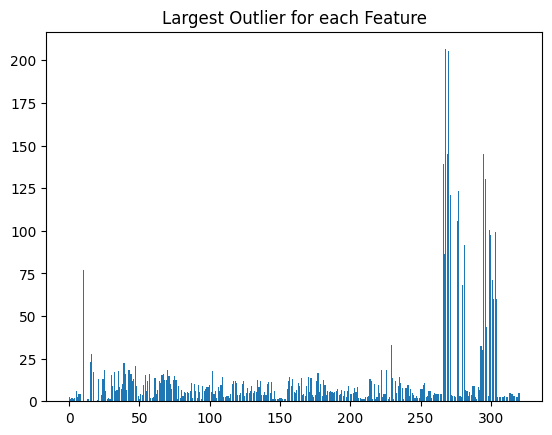

In [3]:
inspectData(X)

As one can see, there are a lot of missing values, about 45% of the dataset are invalid entries. There are also a lot of features with a lot of missing values. We start by removing those features with less than 70% values present. To make sure each sample used may have some explanatory power, we remove the samples with more than 5 missing values in the remaining features. Then we check the resulting size of the dataset, and check how many invalid values are left, and how big a part of the remaining dataset they represent.

In [4]:
yClean, xClean, xHeaderClean, removedFeatures = dataCleaning(Y,X,xHeader,0.7,5,30)

For a threshold of 0.7, there are 144 good features, and 177 bad features
There remains in the data 289870 samples with at most 5 missing values
The number of invalid entries remaing in the dataset is 272938
That is 0.006538802834987332 parts of the whole dataset
Removed 125 samples with outliers more than 30 standard deviations from the mean. There remains 289745 samples in the dataset.
Standardized data by subtracting the mean and dividing by the standard deviation


In [13]:
balancedY, balancedX = balanceData(yClean,xClean,2.5)
tx = makeTrainingData(balancedX)

Created a balanced subset of the data, with 90941 samples, 25983 of positive and 64958 negative samples
Added dummy variable and replaced invalid entries with zeros


In [19]:
lambdas = np.logspace(-2.5,0.5,10)
K = 10
initial_w = np.zeros(tx.shape[1])
iters = 200
gamma = 0.1

In [20]:
regLog_train_loss, regLog_test_loss, regLog_lambda, w_regLog = determineLambda(balancedY,tx,initial_w,lambdas,iters,K,gamma)
y_pred_logistic = makePredictions(w_regLog,X,xHeader,xHeaderClean)
f1_reg_log = f1_score(Y,y_pred_logistic)

In [ ]:
ridge_fixed_lambda = lambda y, tx, lambda_, initial_w, gamma, max_iter: ridge_regression(y,tx,lambda_)
ridge_train_loss ,ridge_test_loss, ridge_lambda, w_ridge = determineLambda(balancedY,tx,initial_w,lambdas,iters,K,gamma,ridge_fixed_lambda)
y_pred_ridge = makePredictions(w_ridge,X,xHeader,xHeaderClean)
f1_ridge = f1_score(Y,y_pred_ridge)

Added dummy variable and replaced invalid entries with zeros


In [ ]:
print(f'f1 scores: regularized logistic: {f1_reg_log}, ridge regression: {f1_ridge}\n lambdas:  regularized logistic: {regLog_lambda}, ridge regression: {ridge_lambda}')

f1 scores: regularized logistic: 0.39817447472405704, ridge regression: 0.25538859551108783
 lambdas:  regularized logistic: 0.046415888336127774, ridge regression: 2.154434690031882
